In [1]:
#---------------------------------------------------------------------
# setup Python environments
#---------------------------------------------------------------------
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt   # module for plotting
plt.style.use("ggplot")
import numpy as np                # module for vectorized numeric calculation

In [2]:
import sys
sys.path.append("../")
from src.Atomic import Opacity
from src import Constants as Cst

wl exceeds the limit in 'ahic' !


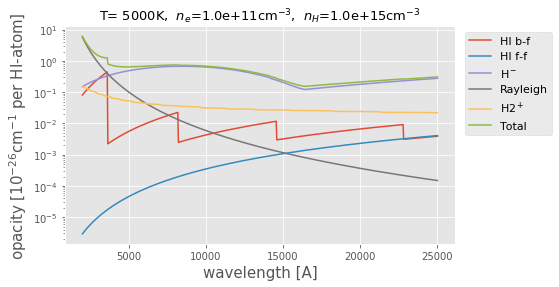

In [10]:
wl = np.linspace(2000.,25000.,600)
T = 5000.
n_e = 1.e11
n_H = 1.e15
HIbf = Opacity.HIbf_CrossSection(T,wl)   # opacity per 1 HI atom in 1.e-26(/cm)
HIff = Opacity.HIff_CrossSection(T,wl)    #            "
Hm   = Opacity.Hminus_CrossSection(T,wl,n_e)  #            "
HIray= Opacity.HIRayleigh_CrossSection(wl)     #            "
H2p  = Opacity.H2p_CrossSection(T,wl,n_e,n_H)    #
#H2p  = Opacity.Thomson_scattering(n_e)    #
fig, ax = plt.subplots(1,1, figsize=(7,4)) #, dpi=150)
ax.plot(wl,HIbf,label="HI b-f")
ax.plot(wl,HIff,label="HI f-f")
ax.plot(wl,Hm,label="H$^-$")
ax.plot(wl,HIray,label="Rayleigh")
ax.plot(wl,H2p,label="H2$^+$")
ax.plot(wl,HIbf+HIff+Hm+HIray+H2p,label="Total")
ax.set_xlabel("wavelength [A]",fontsize=15)
#ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylabel("opacity [10$^{-26}$cm$^{-1}$ per HI-atom]",fontsize=15)
plt.title("T={0:5.0f}K".format(T)+",  $n_e$={0:5.1e}cm$^{{-3}}$".format(n_e)
          +",  $n_H$={0:5.1e}cm$^{{-3}}$".format(n_H),fontsize=13)
ax.legend(bbox_to_anchor=(1.01,1),fontsize=11,ncol=1)

wl exceeds the limit in 'ahic' !


Text(0.5,1,'T= 5000K,  $n_e$=1.0e+11cm$^{-3}$,  $n_H$=1.0e+15cm$^{-3}$')

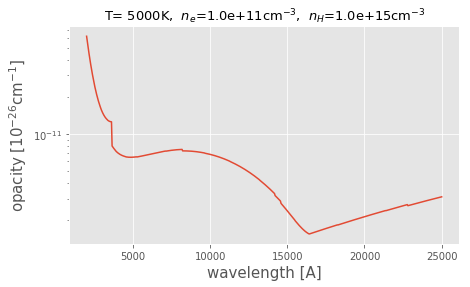

In [5]:
fig, ax = plt.subplots(1,1, figsize=(7,4)) #, dpi=150)
XcLTE= Opacity.xclte(T,n_H,n_e,wl)  #  Continuum opacity in 1.e-26(/cm)
ax.plot(wl,XcLTE,label="Total")
ax.set_xlabel("wavelength [A]",fontsize=15)
#ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylabel("opacity [10$^{-26}$cm$^{-1}$]",fontsize=15)
plt.title("T={0:5.0f}K".format(T)+",  $n_e$={0:5.1e}cm$^{{-3}}$".format(n_e)
          +",  $n_H$={0:5.1e}cm$^{{-3}}$".format(n_H),fontsize=13)

In [6]:
a=np.array([1,2,3,4,
            5,6,7,8])
a.clip(min=4)
ii=np.where(a >= 10)[0] ; count=ii.size
count
aa=Opacity.avH2p(T,wl)
aa

array([9.22251490e-13, 9.08684257e-13, 8.93858924e-13, 8.78177682e-13,
       8.61954092e-13, 8.08420158e-13, 8.00215080e-13, 7.90505799e-13,
       7.79671060e-13, 7.68014332e-13, 7.55778747e-13, 7.43158935e-13,
       7.30310452e-13, 7.17357307e-13, 6.66936307e-13, 6.60757062e-13,
       6.53792870e-13, 6.46219524e-13, 6.38182443e-13, 6.29801909e-13,
       6.21177357e-13, 6.12390906e-13, 6.03510260e-13, 5.94591116e-13,
       5.56860228e-13, 5.52286237e-13, 5.47300689e-13, 5.41985496e-13,
       5.36410281e-13, 5.30634222e-13, 5.24707594e-13, 5.18673085e-13,
       5.12566900e-13, 5.06419705e-13, 5.00257421e-13, 4.94101910e-13,
       4.65356185e-13, 4.62088448e-13, 4.58613013e-13, 4.54966196e-13,
       4.51179640e-13, 4.47280916e-13, 4.43294041e-13, 4.39239929e-13,
       4.35136776e-13, 4.31000404e-13, 4.26844554e-13, 4.22681143e-13,
       4.18520486e-13, 4.14371495e-13, 3.88418989e-13, 3.86537056e-13,
       3.84527678e-13, 3.82408241e-13, 3.80194277e-13, 3.77899666e-13,
      

Text(0,0.5,'kappa [cm-1]')

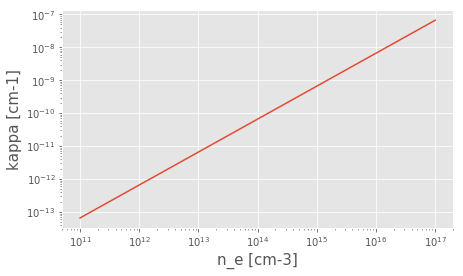

In [9]:
n_e = np.logspace(11,17,201)    # electron density, cm-3
kappa = Opacity.Thomson_scattering(n_e)
fig, ax = plt.subplots(1,1, figsize=(7,4)) #, dpi=150)
ax.plot(n_e, kappa)
ax.set_xlabel("n_e [cm-3]",fontsize=15)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylabel("kappa [cm-1]",fontsize=15)
#plt.title("$n_e$={0:5.2e}cm$^{{-3}}$".format(n_e[i]),fontsize=13)
#ax.legend(bbox_to_anchor=(1.01,1),fontsize=11,ncol=1)